In [1]:
import collections
import sys

import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import roc_curve, auc,precision_recall_fscore_support, average_precision_score, precision_recall_curve, auc, confusion_matrix,accuracy_score, plot_confusion_matrix, PrecisionRecallDisplay 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import seaborn as sns

from tqdm import tqdm

import helper_functions
pd.options.display.max_columns = None

In [2]:
filename = '../data/preprocessed_data.pickle'
figure_path = '../report/figures/'

input_file = open(filename,'rb')
preprocessed_data = pickle.load(input_file)
input_file.close()

In [3]:
le = preprocessed_data['le']
x_train = preprocessed_data['x_train']
y_train = preprocessed_data['y_train']
x_test = preprocessed_data['x_test']
y_test = preprocessed_data['y_test']

In [4]:
scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

In [5]:
def make_labels_binary(label_encoder, labels):
    normal_data_index = np.where(label_encoder.classes_ == 'BENIGN')[0][0]
    new_labels = labels.copy()
    new_labels[labels != normal_data_index] = 1
    new_labels[labels == normal_data_index] = 0
    return new_labels

In [6]:
y_train = make_labels_binary(le, y_train)
y_test = make_labels_binary(le, y_test)

In [7]:
clf = LogisticRegression(random_state=0).fit(x_train, y_train)

/home/pascal/anaconda3/envs/AML/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
preds = clf.predict(x_test)

In [9]:
score = clf.score(x_test, y_test)

In [10]:
score

0.9249882243775894

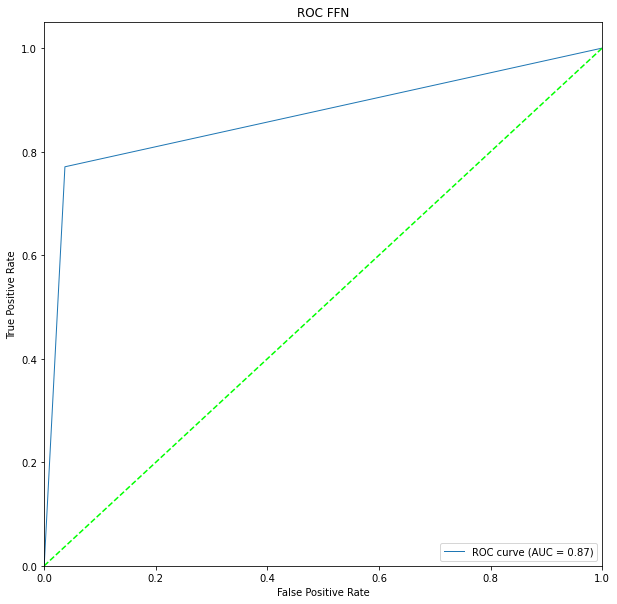

In [13]:
fpr, tpr, thresholds = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

helper_functions.plot_roc(tpr, fpr, roc_auc, figure_path + 'roc_ml.png', 'FFN')

Accuracy Score : 0.9249882243775894
Precision : 0.8360156894485345
Recall : 0.7707037443590682
F1 : 0.8020322760072719


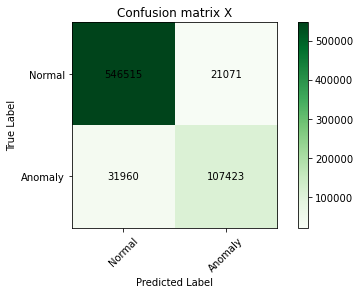

In [12]:
cm = confusion_matrix(y_test, preds)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, preds, average='binary')
print('Accuracy Score :', accuracy_score(y_test, preds))
print('Precision :', precision)
print('Recall :', recall)
print('F1 :', f1)
helper_functions.plot_confusion_matrix(cm, 'none.png', 'X')